In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding = "latin-1")

In [118]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [15]:
df.shape

(60943, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [93]:
df.Item.unique()

array(['Population', 'Grand Total', 'Vegetal Products', 'Animal Products',
       'Cereals - Excluding Beer', 'Wheat and products',
       'Rice and products', 'Barley and products', 'Maize and products',
       'Rye and products', 'Oats', 'Millet and products',
       'Sorghum and products', 'Cereals, Other', 'Starchy Roots',
       'Cassava and products', 'Potatoes and products', 'Sweet potatoes',
       'Yams', 'Roots, Other', 'Sugar Crops', 'Sugar cane', 'Sugar beet',
       'Sugar & Sweeteners', 'Sugar (Raw Equivalent)',
       'Sweeteners, Other', 'Honey', 'Pulses', 'Beans', 'Peas',
       'Pulses, Other and products', 'Treenuts', 'Nuts and products',
       'Oilcrops', 'Soyabeans', 'Groundnuts (Shelled Eq)',
       'Sunflower seed', 'Rape and Mustardseed', 'Cottonseed',
       'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Oilcrops, Other',
       'Vegetable Oils', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil

What is the mean and standard deviation across the whole dataset for the year 2017 to 2 decimal places?

In [21]:
df.describe(include='all')

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943,60943.000000,60943,60943.000000,60943,60943,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
unique,NaN,49,NaN,119,NaN,18,5,NaN,NaN,NaN,NaN,NaN
top,NaN,Kenya,NaN,Milk - Excluding Butter,NaN,Domestic supply quantity,1000 tonnes,NaN,NaN,NaN,NaN,NaN
freq,NaN,1560,NaN,1262,NaN,5295,40933,NaN,NaN,NaN,NaN,NaN
mean,134.265576,NaN,2687.176706,NaN,3814.856456,NaN,NaN,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,NaN,146.055739,NaN,2212.007033,NaN,NaN,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,NaN,2501.000000,NaN,511.000000,NaN,NaN,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,NaN,2562.000000,NaN,684.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,NaN,2630.000000,NaN,5142.000000,NaN,NaN,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,NaN,2775.000000,NaN,5511.000000,NaN,NaN,8.340000,8.460000,8.430000,9.000000,9.000000



Perform a groupby operation on ‘Element’.  What year has the highest sum of Stock Variation?

In [109]:
Stock_Variation_df = df[df['Element'] == 'Stock Variation']

Stock_Variation_total = Stock_Variation_df.groupby('Element')[['Y2014','Y2015','Y2016','Y2017','Y2018']].sum()

print(Stock_Variation_total)

                    Y2014     Y2015     Y2016     Y2017     Y2018
Element                                                          
Stock Variation  58749.83  34910.99  33140.12  54316.91  20577.91


Select columns ‘Y2017’ and ‘Area’, Perform a groupby operation on ‘Area’.  Which of these Areas had the highest sum in 2017?

In [42]:
df.groupby('Area')['Y2017'].sum().sort_values(ascending=False)

Area
Nigeria                        1483268.23
Egypt                           866379.92
South Africa                    517590.54
Ethiopia                        448683.76
Morocco                         388495.36
Ghana                           337599.06
Algeria                         325644.27
United Republic of Tanzania     322616.85
Kenya                           264660.66
Sudan                           239931.92
Cameroon                        232030.43
Angola                          229159.57
Côte d'Ivoire                   224599.01
Uganda                          213950.38
Malawi                          181098.71
Mozambique                      161407.98
Mauritania                      156665.46
Mali                            149928.33
Madagascar                      131197.73
Niger                           126707.58
Benin                           124771.22
Tunisia                         124167.20
Zambia                          103223.77
Burkina Faso                 

What is the total Protein supply quantity in Madagascar in 2015?

In [94]:
# Filter the DataFrame for Madagascar in the Area column and Protein supply in the Element column
filtered_df = df[(df['Area'] == 'Madagascar') & (df['Element'] == 'Protein supply quantity (g/capita/day)')]

# Count the number of entries in the filtered DataFrame for the year 2015
count_protein_supply = filtered_df['Y2015'].sum()

print(count_protein_supply)

173.04999999999998


What is the total sum of Wine produced in 2015 and 2018 respectively?

In [103]:
# Step 1: Filter the DataFrame for entries where 'Item' is 'Wine'
wine_df = df[df['Item'] == 'Wine']

# Step 2: Perform a groupby on the 'Item' column and sum the specific years
wine_production = wine_df.groupby('Item')[['Y2015', 'Y2018']].sum()

print(wine_production)

        Y2015    Y2018
Item                  
Wine  4251.81  4039.32


In [57]:
unique_countries = df['Area'].unique()
number_of_unique_countries = len(unique_countries) 

print(number_of_unique_countries)

49


Perform a groupby operation on ‘Element’.  What is the total number of the sum of Processing in 2017?



In [105]:
processing_df = df[df['Element'] == 'Processing']

processing_total = processing_df.groupby('Element')[['Y2017']].sum()

print(processing_total)

               Y2017
Element             
Processing  292836.0


Select columns ‘Y2017’ and ‘Area’, Perform a groupby operation on ‘Area’.  Which of these Areas had the 7th lowest sum in 2017?

In [110]:
df.groupby('Area')['Y2017'].sum().sort_values(ascending=False)

Area
Nigeria                        1483268.23
Egypt                           866379.92
South Africa                    517590.54
Ethiopia                        448683.76
Morocco                         388495.36
Ghana                           337599.06
Algeria                         325644.27
United Republic of Tanzania     322616.85
Kenya                           264660.66
Sudan                           239931.92
Cameroon                        232030.43
Angola                          229159.57
Côte d'Ivoire                   224599.01
Uganda                          213950.38
Malawi                          181098.71
Mozambique                      161407.98
Mauritania                      156665.46
Mali                            149928.33
Madagascar                      131197.73
Niger                           126707.58
Benin                           124771.22
Tunisia                         124167.20
Zambia                          103223.77
Burkina Faso                 

Which year had the least correlation with ‘Element Code’?



In [113]:
correlations = df.corr()['Element Code']

# Drop 'Element Code' from correlations
correlations = correlations.drop('Element Code')

# Find the year with the least correlation with 'Element Code'
year_least_correlation = correlations.idxmin()

print("Year with the least correlation with 'Element Code':", year_least_correlation)

Year with the least correlation with 'Element Code': Item Code


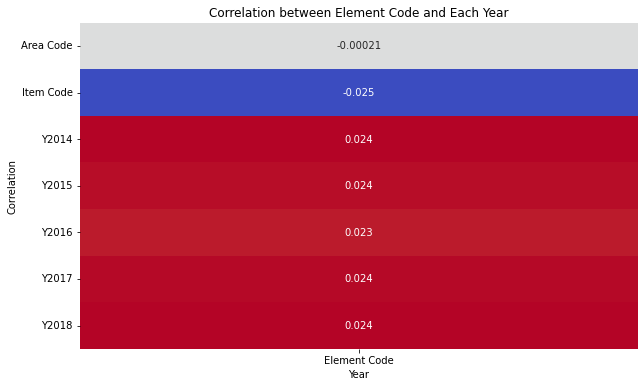

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

element_code_correlation = corr_matrix['Element Code'].drop('Element Code')

plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(element_code_correlation), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between Element Code and Each Year')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.show()

What is the total number and percentage of missing data in 2014 to 3 decimal places?



In [117]:
df.Y2014.isnull().sum()

1589

In [114]:
S = [['him', 'sell'], [90, 28, 43]]

S[0][1][1]

'e'

In [111]:
my_tuppy = (1,2,5,8)

my_tuppy[2] = 6

TypeError: 'tuple' object does not support item assignment